Charger l'image.

(1200, 819, 3)


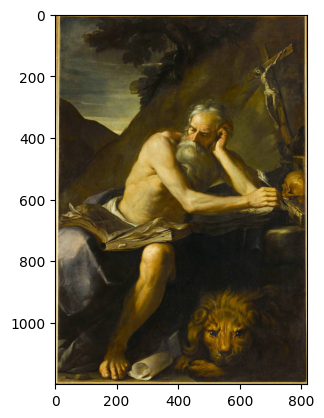

In [196]:
import skimage as ski
import matplotlib.pyplot as plt

image_path = "data/st jerome.jpg"

image = ski.io.imread(image_path)

plt.imshow(image)
print(image.shape)

In [197]:
# test_image = ski.color.rgb2gray(image) > ski.filters.threshold_otsu(ski.color.rgb2gray(image))
# plt.imshow(test_image, cmap="gray")

In [198]:
# image = ski.color.rgb2gray(image)
# plt.imshow(image, cmap="gray")

In [199]:
# image = ski.exposure.equalize_adapthist(image)
# plt.imshow(image, cmap="gray")

In [200]:
# for _ in range(5):
#     image = ski.restoration.denoise_bilateral(image, sigma_color=0.1, sigma_spatial=2)
# plt.imshow(image, cmap="gray")

Trouver les bords de l'image.

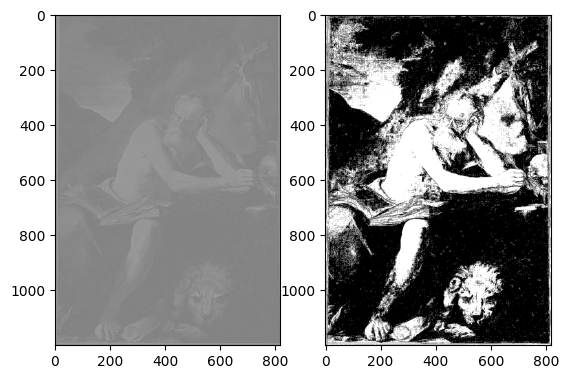

In [201]:
from fdog import difference_of_gaussians
import numpy as np

fig, axs = plt.subplots(1, 2)

low_sigma=0.4

dog_image = ski.color.rgb2gray(difference_of_gaussians(image, low_sigma, high_sigma=1.7*low_sigma, p=32.45))
axs[0].imshow(dog_image, cmap="gray")
thresh_image = dog_image > ski.filters.threshold_mean(dog_image)
axs[1].imshow(thresh_image, cmap="gray")

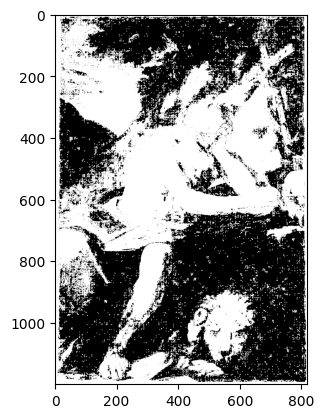

In [202]:
dilated_image = ski.morphology.dilation(thresh_image)
plt.imshow(dilated_image, cmap="gray")

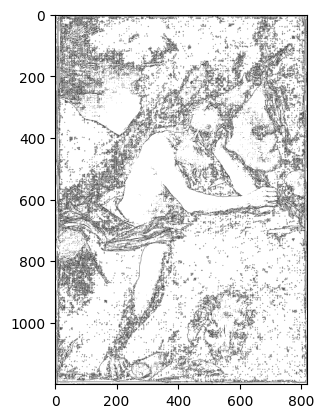

In [203]:
abs_diff = 1 - thresh_image ^ dilated_image
plt.imshow(abs_diff, cmap="gray")

In [204]:
# abs_diff *= 255
# abs_diff = abs_diff.astype(np.int8)
# edge_image = abs_diff
edge_image=abs_diff

In [205]:
# from subprocess import run

# edge_image_path = image_path + "_edges.png"
# thinned_edge_image_path = image_path + "_thinned.png"

# ski.io.imsave(edge_image_path, abs_diff)
# run(["./skeletonize", "-i", "data/st jerome photoshop.jpg", "-o", thinned_edge_image_path])

Regrouper les bords de l'image en composantes connexes.

In [206]:
# from edge_walker import group_edges
# from utils import sort_edges


# edge_image = ski.io.imread(thinned_edge_image_path) >= 190
# plt.imshow(edge_image, cmap="gray")

In [207]:
edge_groups = sort_edges(group_edges(edge_image, min_edge_length=5, step=1))

148563
(67, 2)
148497
(8, 2)
148490
148488
148487
148485
148484
148483
(17, 2)
148467
148463
(10, 2)
148454
(27, 2)
148428
(9, 2)
148420
148419
(9, 2)
148411
148408
148405
148402
(18, 2)
148385
148382
148380
(6, 2)
148375
148374
(11, 2)
148364
148361
148359
(9, 2)
148351
(58, 2)
148294
148291
(17, 2)
148275
(23, 2)
148253
(8, 2)
148246
(33, 2)
148214
(9, 2)
148206
(23, 2)
148184
148180
148179
148177
148174
(14, 2)
148161
148160
(11, 2)
148150
148148
(98, 2)
148051
148049
(9, 2)
148041
(134, 2)
147908
(7, 2)
147902
147901
147898
(6, 2)
147893
147891
147890
(303, 2)
147588
147586
(11, 2)
147576
(9, 2)
147568
(7, 2)
147562
(9, 2)
147554
147552
(10, 2)
147543
147540
147538
147536
(9, 2)
147528
(12, 2)
147517
147516
147514
147511
147508
147507
147506
147504
147502
(9, 2)
147494
147493
147492
147489
(12, 2)
147478
(7, 2)
147472
147471
147468
(9, 2)
147460
147457
(17, 2)
147441
147439
147437
147434
147433
147432
(11, 2)
147422
147421
147418
147417
147415
147414
(30, 2)
147385
147382
147380
(2

In [ ]:
print(len(edge_groups))

8478


<Axes: ylabel='Count'>

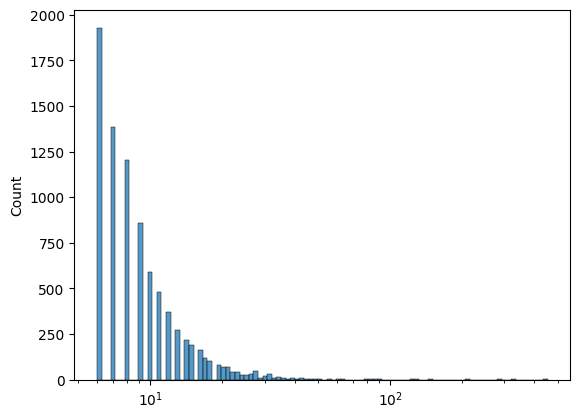

In [ ]:
edge_group_lens = []
for g in edge_groups:
    edge_group_lens.append(len(g))

import seaborn as sns

sns.histplot(edge_group_lens, log_scale=True)
#hist = plt.hist(edge_group_lens)

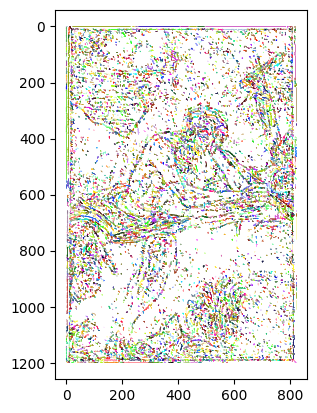

In [ ]:
import matplotlib.colors as mcolors
cs = list(mcolors.XKCD_COLORS.values())*1000


plt.gca().invert_yaxis()
for c, point_group in zip(cs, edge_groups):
    preceding_point = point_group[0]
    for p in point_group:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c=c, linewidth=0.5)
        preceding_point = p.copy()

plt.gca().set_aspect("equal")

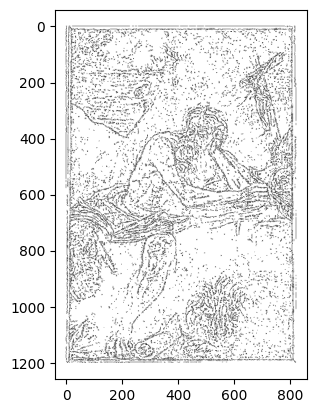

In [ ]:
plt.gca().invert_yaxis()
ids=0
for point_group in edge_groups:
    ids+=1
    preceding_point = point_group[0]
    for p in point_group:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c="black", linewidth=0.2)
        preceding_point = p.copy()


plt.gca().set_aspect("equal")

In [ ]:
import pickle

with open("data/jerome 2 edges.pkl", "wb") as f:
    pickle.dump(edge_groups, f)
    f.close()